# First Steps with SynSatiPy

Here, we show:
1. how to load synsatipy within a notebook
2. how to initialize a synsat class
3. how to run synsat on idealized profile (test data)

## Setup Env and Load Libraries 

In [1]:
import os, sys
os.environ['RTTOV_PYTHON_WRAPPER'] = '/work/bb1262/tools/rttov/rttov-v13.2/wrapper'

In [2]:
import synsatipy

from synsatipy.synsat import SynSat

from synsatipy.tests.synsat_test import SynSatTest

In [3]:
import pylab as plt

## Run a SynSat Calculation with Example Data 

### Initialize SynSatTest and Input Test Data 

The default instrument used in SynSatiPy is "MSG SEVIRI".

In [4]:
synsat_test = SynSatTest()

... [synsat] set cloud / aerosol file to  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_msg_3_seviri.dat
... [synsat] load coefficient file /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_msg_3_seviri_o3.dat
... [synsat] example data loaded


 2025/05/07  07:57:01  Load coefficients:
 2025/05/07  07:57:01  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_msg_3_seviri_o3.dat
Load successful >>>>> inst_id : 1, nchannels : 6.
 2025/05/07  07:57:01  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_msg_3_seviri.dat


### Example Data are Simple Profiles

Example data have been just prescribed as simple profiles that are gathered within the `synsat_test.Profiles` class (inherited from `pyrttov`) 

Text(0.5, 0, 'specific humidity / ppmv')

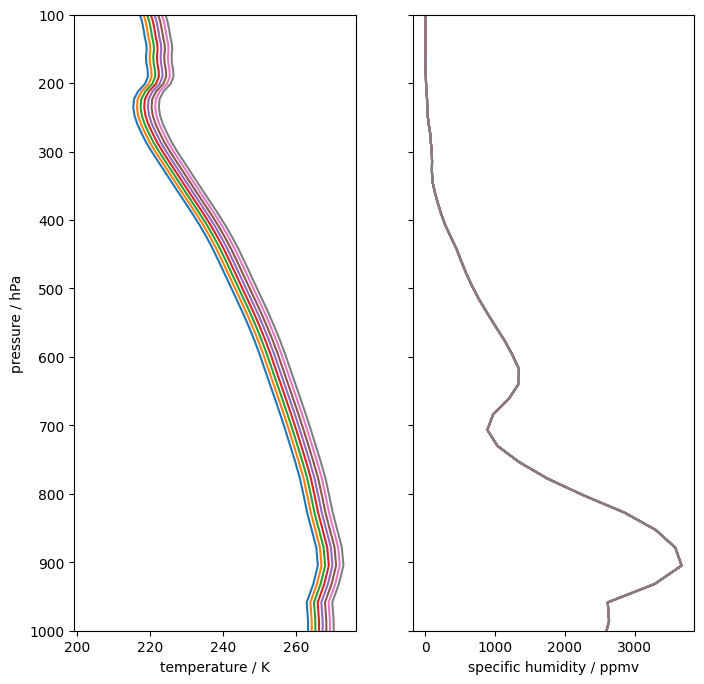

In [5]:
fig, axs = plt.subplots( ncols = 2, figsize = (8,8), sharey = True)
nprof = synsat_test.Profiles.Nprofiles

for iprof in range( nprof ):
    p = synsat_test.Profiles.P[iprof]
    T = synsat_test.Profiles.T[iprof]
    q = synsat_test.Profiles.Q[iprof]
    
    axs[0].plot(T,p)

    axs[1].plot(q,p)

axs[0].set_ylim(1000,100)
axs[0].set_ylabel('pressure / hPa')
axs[0].set_xlabel('temperature / K')
axs[1].set_xlabel('specific humidity / ppmv')


### Running SynSatiPy 

In [6]:
synsat_test.run_workflow()

IR emissivity atlas loaded successfully
Atlas deallocated.
 2025/05/07  07:57:02  Running RTTOV using nthreads =    1 and nprofs_per_call =        1


### Plot the Output 

The attribute `synsat_test.BtRefl` is holding the output vars.

In [7]:
bts = synsat_test.BtRefl

Text(0, 0.5, 'brightness temperatures / K')

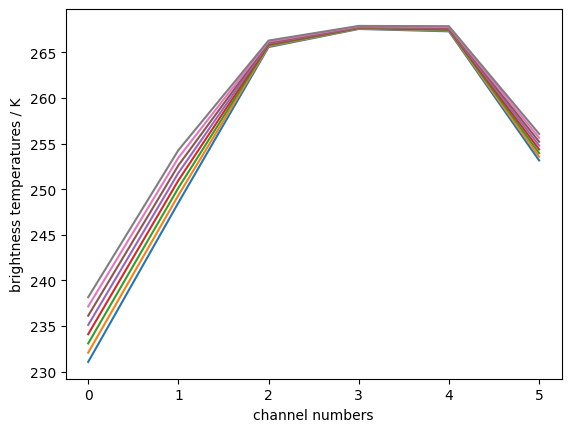

In [8]:
for iprof in range( nprof ):
    plt.plot( bts[iprof] ) 

plt.xlabel( 'channel numbers' )
plt.ylabel( 'brightness temperatures / K' )

## Initialize Synsat Class for a Particular Instrument

### for MSG SEVIRI

In [9]:
synsat_seviri = SynSat( synsat_instrument = 'SEVIRI' )

... [synsat] set cloud / aerosol file to  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_msg_3_seviri.dat
... [synsat] load coefficient file /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_msg_3_seviri_o3.dat


Load successful >>>>> inst_id : 2, nchannels : 6.
 2025/05/07  07:57:02  Load coefficients:
 2025/05/07  07:57:02  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_msg_3_seviri_o3.dat
 2025/05/07  07:57:02  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_msg_3_seviri.dat


### for GOES ABI

In [10]:
synsat_abi = SynSat( synsat_instrument = 'ABI' )

... [synsat] set cloud / aerosol file to /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_goes_16_abi.dat
... [synsat] load coefficient file /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_goes_16_abi_o3.dat


 2025/05/07  07:57:02  Load coefficients:
 2025/05/07  07:57:02  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/rttov13pred54L/rtcoef_goes_16_abi_o3.dat
Load successful >>>>> inst_id : 3, nchannels : 10.
 2025/05/07  07:57:02  /work/bb1262/tools/rttov/rttov-v13.2/rtcoef_rttov13/cldaer_visir/sccldcoef_goes_16_abi.dat
